In [12]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [13]:
data = pd.read_csv('NSE-TataGlobal.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 1:2].values
testing_set=data.iloc[930:,1:2].values
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [14]:
data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Lacs)', axis=1, inplace=True)
print(data.head())
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date    Open    High     Low   Close
0  2018-09-28  234.05  235.95  230.20  233.75
1  2018-09-27  234.55  236.80  231.10  233.25
2  2018-09-26  240.00  240.00  232.50  234.25
3  2018-09-25  233.30  236.75  232.00  236.10
4  2018-09-24  233.55  239.20  230.75  233.30


In [15]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

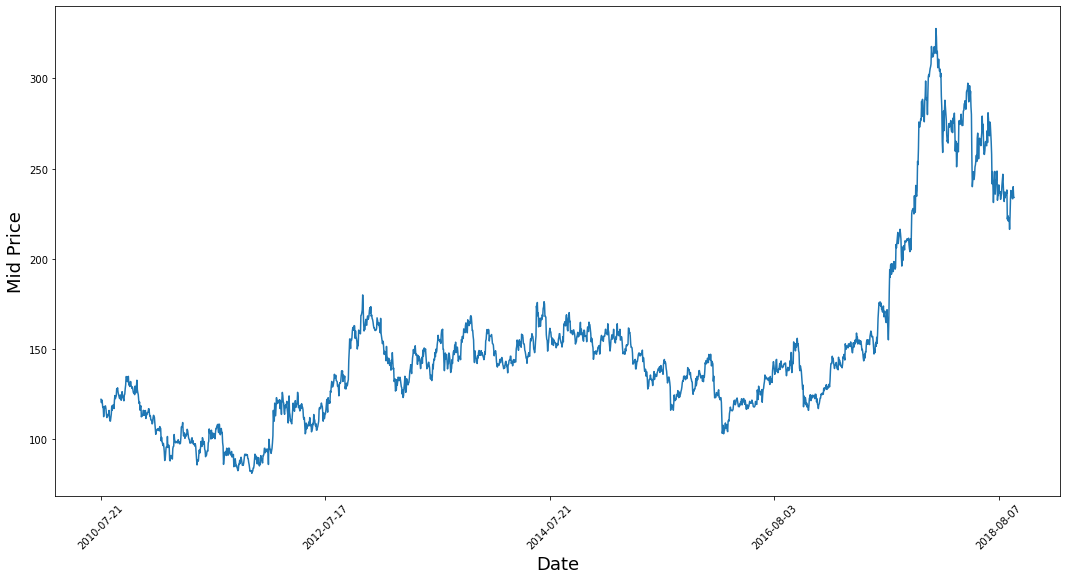

In [16]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Open']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [26]:
model = Sequential()

model.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.1))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 75))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
15/15 [==============================] - 8s 22ms/step - loss: 0.0777
Epoch 2/200
15/15 [==============================] - 0s 24ms/step - loss: 0.0093
Epoch 3/200
15/15 [==============================] - 0s 26ms/step - loss: 0.0047
Epoch 4/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0036
Epoch 5/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0032
Epoch 6/200
15/15 [==============================] - 0s 24ms/step - loss: 0.0035
Epoch 7/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0033
Epoch 8/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0030
Epoch 9/200
15/15 [==============================] - 0s 24ms/step - loss: 0.0031
Epoch 10/200
15/15 [==============================] - 0s 27ms/step - loss: 0.0029
Epoch 11/200
15/15 [==============================] - 0s 28ms/step - loss: 0.0032
Epoch 12/200
15/15 [==============================] - 0s 26ms/step - loss: 0.0028
Epoch 13/200
15/15 [=====

15/15 [==============================] - 0s 22ms/step - loss: 0.0016
Epoch 101/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0016
Epoch 102/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0015
Epoch 103/200
15/15 [==============================] - 0s 23ms/step - loss: 0.0013
Epoch 104/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0014
Epoch 105/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0017
Epoch 106/200
15/15 [==============================] - 0s 24ms/step - loss: 0.0016
Epoch 107/200
15/15 [==============================] - 0s 23ms/step - loss: 0.0016
Epoch 108/200
15/15 [==============================] - 0s 23ms/step - loss: 0.0017
Epoch 109/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0018
Epoch 110/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0016
Epoch 111/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0015
Epoch 112/200
15/1

15/15 [==============================] - 0s 23ms/step - loss: 0.0010
Epoch 199/200
15/15 [==============================] - 0s 24ms/step - loss: 0.0010
Epoch 200/200
15/15 [==============================] - 0s 22ms/step - loss: 9.0116e-04


In [28]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

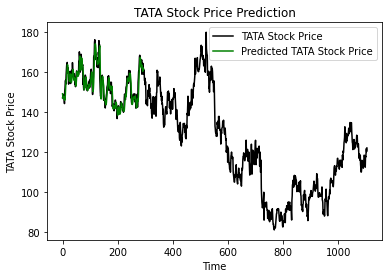

In [30]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()